# Ejemplo de Clasificador basado en una Red Completamente Conectada.
Este es un ejemplo de clasificador basado en una Red Completamente Conectada (MLP) con objetivo pronósticar si la suma de dos enteros es múltiplo de 3 (etiqueta 0) o no (etiqueta 1).

## Importar librerías

In [1]:
# seed the pseudorandom number generator
from random import seed
import random
from random import randint

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy.stats
from pylab import *

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow import keras

from keras.models import Sequential  # Model type to be used

In [6]:
from sklearn.metrics import mean_squared_error

## Fijar semilla del generador de números aleatorios

In [7]:
seed(1234)

## Generados dos listas de números aleatorios y sumarlos

In [8]:
list_lenght=1000

In [9]:
randomList1 = []
# Set a length of the list to 10
for i in range(0, list_lenght):
    # any random numbers from 0 to 10
    randomList1.append(randint(0, 10))

print("Primera lista", randomList1)

Primera lista [3, 6, 5, 4, 8, 9, 1, 7, 9, 6, 8, 0, 5, 0, 9, 6, 2, 0, 5, 2, 6, 3, 7, 0, 9, 0, 3, 2, 3, 1, 3, 1, 3, 7, 1, 7, 4, 0, 5, 1, 5, 9, 9, 4, 0, 9, 8, 8, 6, 8, 6, 3, 1, 2, 5, 2, 5, 6, 7, 4, 3, 5, 6, 4, 6, 2, 4, 2, 7, 9, 7, 7, 2, 9, 7, 4, 9, 0, 9, 2, 9, 1, 2, 9, 1, 5, 7, 4, 7, 7, 1, 4, 0, 5, 4, 9, 2, 9, 1, 3, 5, 9, 3, 0, 4, 4, 0, 6, 8, 4, 8, 1, 8, 9, 8, 2, 0, 2, 2, 3, 2, 9, 7, 4, 8, 1, 9, 2, 7, 4, 3, 2, 5, 5, 1, 0, 8, 4, 0, 0, 1, 0, 3, 9, 1, 9, 3, 7, 9, 3, 4, 4, 1, 1, 6, 2, 9, 8, 7, 8, 0, 8, 7, 9, 5, 6, 3, 9, 4, 7, 7, 1, 7, 2, 5, 2, 7, 2, 6, 8, 6, 1, 9, 3, 3, 4, 9, 7, 2, 8, 1, 9, 4, 3, 1, 0, 7, 8, 0, 9, 3, 9, 3, 9, 0, 5, 9, 2, 3, 1, 7, 1, 4, 7, 3, 8, 4, 5, 3, 8, 8, 8, 1, 3, 6, 8, 9, 1, 5, 8, 4, 1, 1, 1, 2, 3, 4, 2, 1, 9, 4, 0, 0, 2, 1, 2, 5, 9, 8, 8, 7, 5, 7, 0, 0, 6, 6, 1, 9, 4, 6, 7, 2, 0, 7, 0, 2, 8, 4, 8, 3, 2, 4, 7, 7, 0, 1, 1, 0, 0, 0, 1, 1, 9, 4, 9, 9, 5, 2, 4, 1, 0, 3, 5, 2, 3, 3, 5, 4, 5, 4, 0, 5, 6, 7, 3, 1, 5, 4, 5, 9, 1, 7, 6, 3, 3, 0, 0, 2, 3, 1, 6, 1, 3, 5, 6, 9, 2, 6

In [10]:
randomList2 = []
# Set a length of the list to 10
for i in range(0, list_lenght):
    # any random numbers from 0 to 10
    randomList2.append(randint(0, 10))

print("Printing list of 10 random numbers")
print("Segunda lista",randomList2)

Printing list of 10 random numbers
Segunda lista [5, 7, 0, 2, 3, 4, 8, 4, 3, 1, 8, 9, 1, 7, 2, 8, 5, 9, 3, 0, 0, 2, 3, 1, 6, 8, 7, 0, 1, 9, 7, 0, 1, 4, 8, 1, 9, 0, 2, 6, 2, 5, 6, 3, 5, 0, 0, 2, 1, 1, 1, 3, 8, 2, 2, 5, 4, 9, 4, 1, 3, 8, 4, 4, 0, 4, 5, 6, 9, 4, 5, 6, 6, 6, 7, 1, 1, 0, 5, 9, 2, 1, 3, 1, 5, 0, 3, 2, 0, 5, 4, 8, 3, 0, 7, 9, 6, 3, 4, 3, 7, 0, 9, 7, 3, 7, 6, 0, 4, 4, 3, 2, 7, 0, 0, 0, 4, 2, 3, 7, 9, 6, 9, 1, 3, 2, 6, 2, 1, 6, 7, 0, 3, 3, 6, 8, 0, 8, 9, 2, 9, 7, 6, 5, 8, 2, 6, 0, 6, 9, 5, 4, 0, 1, 8, 8, 6, 9, 5, 5, 1, 8, 5, 9, 4, 8, 4, 4, 7, 1, 9, 0, 1, 6, 8, 3, 1, 3, 6, 3, 5, 0, 3, 5, 1, 3, 8, 0, 7, 3, 3, 2, 4, 8, 8, 0, 7, 8, 0, 8, 6, 4, 2, 3, 0, 3, 1, 1, 6, 7, 8, 4, 9, 0, 4, 0, 9, 9, 8, 7, 1, 9, 6, 7, 7, 5, 7, 8, 1, 1, 9, 3, 9, 3, 3, 5, 8, 7, 3, 9, 0, 3, 9, 7, 0, 1, 3, 8, 0, 3, 5, 7, 1, 4, 5, 0, 1, 7, 9, 7, 3, 3, 9, 1, 7, 1, 5, 6, 8, 4, 9, 2, 0, 6, 1, 7, 0, 5, 4, 7, 7, 4, 8, 0, 7, 7, 6, 2, 2, 3, 2, 3, 5, 7, 2, 3, 7, 5, 7, 8, 9, 9, 7, 4, 9, 7, 8, 0, 2, 1, 7, 6, 5, 1, 8, 8, 1,

In [11]:
randomSum=np.add(randomList1,randomList2)
print(randomSum)

[ 8 13  5  6 11 13  9 11 12  7 16  9  6  7 11 14  7  9  8  2  6  5 10  1
 15  8 10  2  4 10 10  1  4 11  9  8 13  0  7  7  7 14 15  7  5  9  8 10
  7  9  7  6  9  4  7  7  9 15 11  5  6 13 10  8  6  6  9  8 16 13 12 13
  8 15 14  5 10  0 14 11 11  2  5 10  6  5 10  6  7 12  5 12  3  5 11 18
  8 12  5  6 12  9 12  7  7 11  6  6 12  8 11  3 15  9  8  2  4  4  5 10
 11 15 16  5 11  3 15  4  8 10 10  2  8  8  7  8  8 12  9  2 10  7  9 14
  9 11  9  7 15 12  9  8  1  2 14 10 15 17 12 13  1 16 12 18  9 14  7 13
 11  8 16  1  8  8 13  5  8  5 12 11 11  1 12  8  4  7 17  7  9 11  4 11
  8 11  9  0 14 16  0 17  9 13  5 12  0  8 10  3  9  8 15  5 13  7  7  8
 13 14 11 15  9 17  7 10 13 13 16  9  6  9 13  4 10  4  5  8 12  9  4 18
  4  3  9  9  1  3  8 17  8 11 12 12  8  4  5  6  7  8 18 11  9 10 11  1
 14  1  7 14 12 12 12  4  4 13  8  7  1  6  4  7  7  5  9  9 11 16 15  7
  4  7  3  3  8 12  4  6 10 10 11 13 13  9 12 10 16 10  9  5  6  6 16  7
 12  7 11 11  1  8  8  6  6 12  1  4  7 12 14  7 11

In [12]:
Y_label=mod(randomSum,3)
print(Y_label)

[2 1 2 0 2 1 0 2 0 1 1 0 0 1 2 2 1 0 2 2 0 2 1 1 0 2 1 2 1 1 1 1 1 2 0 2 1
 0 1 1 1 2 0 1 2 0 2 1 1 0 1 0 0 1 1 1 0 0 2 2 0 1 1 2 0 0 0 2 1 1 0 1 2 0
 2 2 1 0 2 2 2 2 2 1 0 2 1 0 1 0 2 0 0 2 2 0 2 0 2 0 0 0 0 1 1 2 0 0 0 2 2
 0 0 0 2 2 1 1 2 1 2 0 1 2 2 0 0 1 2 1 1 2 2 2 1 2 2 0 0 2 1 1 0 2 0 2 0 1
 0 0 0 2 1 2 2 1 0 2 0 1 1 1 0 0 0 2 1 1 2 2 1 1 2 2 1 2 2 2 0 2 2 1 0 2 1
 1 2 1 0 2 1 2 2 2 0 0 2 1 0 2 0 1 2 0 0 2 1 0 0 2 0 2 1 1 1 2 1 2 2 0 0 2
 1 1 1 1 1 0 0 0 1 1 1 1 2 2 0 0 1 0 1 0 0 0 1 0 2 2 2 2 0 0 2 1 2 0 1 2 0
 2 0 1 2 1 2 1 1 2 0 0 0 1 1 1 2 1 1 0 1 1 1 2 0 0 2 1 0 1 1 1 0 0 2 0 1 0
 1 1 2 1 1 0 0 1 1 1 0 2 0 0 1 1 0 1 2 2 1 2 2 0 0 0 1 1 1 0 2 1 2 0 0 1 2
 2 1 2 2 0 0 2 1 0 0 0 2 2 2 0 1 1 0 0 0 1 2 1 1 0 0 1 2 0 1 0 0 0 1 0 0 1
 0 1 2 1 0 2 0 1 2 0 2 2 1 0 1 0 0 1 2 2 1 2 2 1 2 1 2 1 2 0 1 1 0 0 2 1 1
 2 2 1 0 0 2 0 1 0 1 1 1 1 2 1 1 1 0 1 0 1 2 1 1 0 2 1 1 0 2 0 2 1 1 2 1 2
 2 0 2 2 2 2 0 0 2 1 2 1 0 1 0 1 1 1 0 0 2 1 2 0 0 0 2 1 0 0 0 2 1 0 2 0 2
 1 1 0 0 1 2 1 1 2 0 0 2 

In [13]:
Y_label[Y_label >1] = 1
print(Y_label)

[1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0
 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1
 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1
 1 1 0 0 1 1 1 1 1 0 0 1 

Se construye un dataframe con las anteriores listas distribuidas en forma de columnas.

In [14]:
# Some arrangements for next plots
df2=np.column_stack((randomList1, randomList2, randomSum,Y_label))
print(df2.shape)
dfnew=pd.DataFrame(data=df2)
print(dfnew.shape)

(1000, 4)
(1000, 4)


Se pone nombre a las columnas.

In [15]:
print(dfnew.columns)
dfnew.columns = ["V1","V2","Suma","Y_label"]
print(dfnew.columns)

RangeIndex(start=0, stop=4, step=1)
Index(['V1', 'V2', 'Suma', 'Y_label'], dtype='object')


Se borran estructuras de datos innecesarias.

In [16]:
del(df2)

In [17]:
print(dfnew)

     V1  V2  Suma  Y_label
0     3   5     8        1
1     6   7    13        1
2     5   0     5        1
3     4   2     6        0
4     8   3    11        1
..   ..  ..   ...      ...
995   7   1     8        1
996   6   3     9        0
997   0   7     7        1
998   2   4     6        0
999   6   7    13        1

[1000 rows x 4 columns]


Se eliminan las variables no necesarias.

In [18]:
del(randomList1,randomList2,randomSum)

A partir del dataframe, se separan las variables independientes (X) y las dependientes (Y).

In [19]:
# Para las variables independientes se seleccionan las dos primeras columnas del dataframe dfnew.
X = dfnew.iloc[:,0:2]
print(X.shape)

(1000, 2)


In [20]:
# y para la variable dependiente se selecciona la cuarta columna (índice 3).
Y = dfnew.iloc[:,3]
print(Y.shape)

(1000,)


In [21]:
# Quality check
assert X.shape[0] == Y.shape[0]

## Separación de los conjuntos de entrenamiento y test.
Se verifica la dimensionalidad.

In [22]:
print(X.shape)
test_size = int(np.floor(0.30*X.shape[0]) )
print(test_size)

(1000, 2)
300


In [23]:
 X = np.asarray(X)# convertirnos los datos de DataFrame a Numpy Arrays
 Y = np.asarray(Y)# para que sean leidos por los modulos de Keras

In [24]:
trainX, testX = X[:-test_size], X[-test_size:]
trainY, testY = Y[:-test_size], Y[-test_size:]
print(trainX.shape,testX.shape)
print(len(trainY),len(testY))

(700, 2) (300, 2)
700 300


In [25]:
 trainX_num=trainX.shape[1]
 print(trainX_num)

2


Definición de la Red Neuronal

In [26]:
model = keras.Sequential() # creamos el modelo secuencial

# Ponemos una primera capa oculta
model.add(Dense(100, activation='relu', input_shape=(2,)))
print(model.layers[-1].output_shape)
# Segunda capa
model.add(Dense(50, activation='relu'))
print(model.layers[-1].output_shape)
# Tercera capa
model.add(Dense(50, activation='relu'))
print(model.layers[-1].output_shape)
# Incorporamos la capa de salida
model.add(Dense( 1, activation='sigmoid'))

(None, 100)
(None, 50)
(None, 50)


Se muestra un resumen de la red creada.

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7951 (31.06 KB)
Trainable params: 7951 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Se compila el modelo, incluyendo la elección del optimizador y del error que se minimizará durante el entrenamiento. A continuación se entrena el modelo, almacenando la información del error en la variable "history".

In [28]:
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [29]:
history=model.fit(trainX, trainY, epochs=100, batch_size=16, validation_data=(testX, testY), verbose=2)

Epoch 1/100
44/44 - 5s - loss: 0.6595 - accuracy: 0.6629 - val_loss: 0.6529 - val_accuracy: 0.6667 - 5s/epoch - 113ms/step
Epoch 2/100
44/44 - 1s - loss: 0.6481 - accuracy: 0.6629 - val_loss: 0.6478 - val_accuracy: 0.6667 - 602ms/epoch - 14ms/step
Epoch 3/100
44/44 - 1s - loss: 0.6505 - accuracy: 0.6643 - val_loss: 0.6428 - val_accuracy: 0.6667 - 572ms/epoch - 13ms/step
Epoch 4/100
44/44 - 0s - loss: 0.6479 - accuracy: 0.6700 - val_loss: 0.6493 - val_accuracy: 0.6833 - 405ms/epoch - 9ms/step
Epoch 5/100
44/44 - 0s - loss: 0.6456 - accuracy: 0.6757 - val_loss: 0.6391 - val_accuracy: 0.6833 - 400ms/epoch - 9ms/step
Epoch 6/100
44/44 - 0s - loss: 0.6408 - accuracy: 0.6757 - val_loss: 0.6344 - val_accuracy: 0.6833 - 334ms/epoch - 8ms/step
Epoch 7/100
44/44 - 0s - loss: 0.6406 - accuracy: 0.6757 - val_loss: 0.6329 - val_accuracy: 0.6833 - 271ms/epoch - 6ms/step
Epoch 8/100
44/44 - 0s - loss: 0.6361 - accuracy: 0.6757 - val_loss: 0.6306 - val_accuracy: 0.6833 - 293ms/epoch - 7ms/step
Epoch 9

In [30]:
pred = model.predict(testX)

10/10 [==============================] - 0s 2ms/step


In [31]:
# Errors calculation ECM y EAM
testScoreECM = mean_squared_error(testY, pred)
print('ECM: %.4f' % (testScoreECM))

ECM: 0.1320


## Visualización de resultados

En la siguiente gráfica se visualiza la evolución del error para el conjunto de entrenamiento y test en función de las épocas.

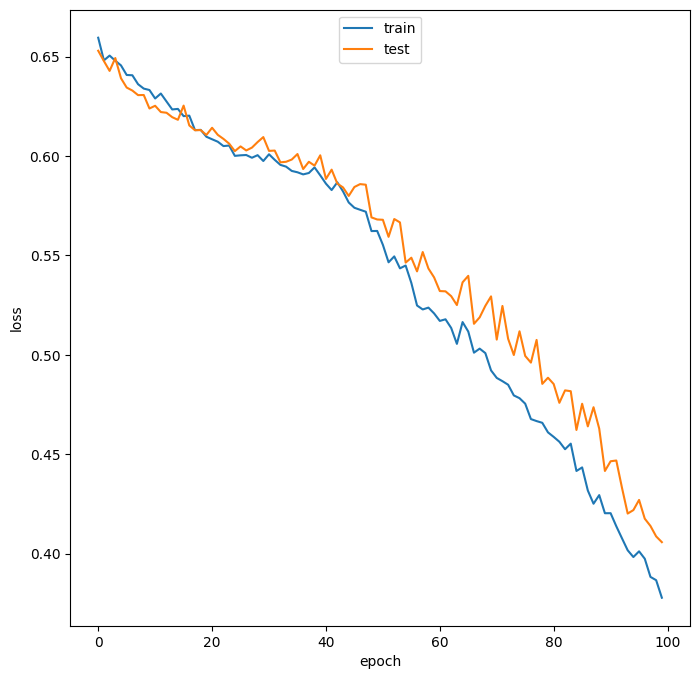

In [32]:
plt.figure(1, figsize=(8,8))
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

#plt.yscale("log")
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xlim(-0.5,20.1)
plt.legend(['train', 'test'], loc='upper center')

from google.colab import files
plt.savefig('loss_MLP.eps')
#files.download('loss_MLP.eps') # Descomentar para descargar localmente

En la siguiente gráfica se visualiza la evolución de la calidad de la clasificación para el conjunto de entrenamiento y test en función de las épocas.

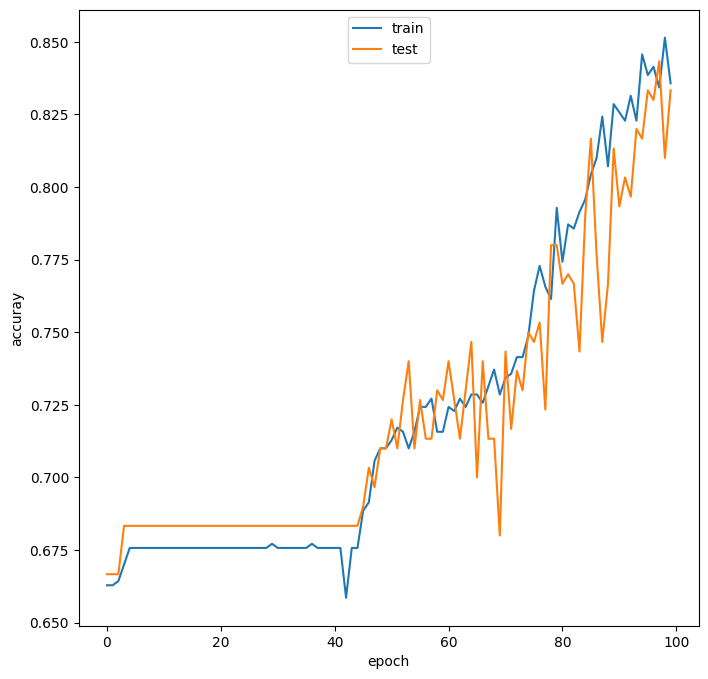

In [33]:
plt.figure(1, figsize=(8,8))
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper center')


In [34]:
print('V1','V2','\t\t','Real','\t','Pronóstico')
for i in range(len(testY)):
  print(i, testX[i],'\t',testY[i],'\t',pred[i])

V1 V2 		 Real 	 Pronóstico
0 [2 5] 	 1 	 [0.96963733]
1 [5 4] 	 0 	 [0.50145525]
2 [5 0] 	 1 	 [0.7533616]
3 [6 9] 	 0 	 [0.289866]
4 [5 5] 	 1 	 [0.63318914]
5 [7 3] 	 1 	 [0.7764303]
6 [3 5] 	 1 	 [0.91647416]
7 [0 1] 	 1 	 [0.9999842]
8 [2 6] 	 1 	 [0.9884621]
9 [3 3] 	 0 	 [0.169053]
10 [1 8] 	 0 	 [0.6768052]
11 [9 1] 	 1 	 [0.5330701]
12 [9 0] 	 0 	 [0.429889]
13 [8 3] 	 1 	 [0.7323611]
14 [8 7] 	 0 	 [0.5949308]
15 [0 6] 	 0 	 [0.6355284]
16 [8 5] 	 1 	 [0.5165435]
17 [6 6] 	 0 	 [0.6282086]
18 [6 2] 	 1 	 [0.7705296]
19 [1 4] 	 1 	 [0.99527174]
20 [4 5] 	 0 	 [0.3481487]
21 [3 5] 	 1 	 [0.91647416]
22 [5 3] 	 1 	 [0.75184244]
23 [5 8] 	 1 	 [0.92414653]
24 [4 1] 	 1 	 [0.80990016]
25 [9 7] 	 1 	 [0.55651003]
26 [3 4] 	 1 	 [0.9206734]
27 [8 9] 	 1 	 [0.7270284]
28 [2 8] 	 1 	 [0.4935215]
29 [3 4] 	 1 	 [0.9206734]
30 [0 9] 	 0 	 [0.5108834]
31 [6 7] 	 1 	 [0.740149]
32 [2 0] 	 1 	 [0.9996545]
33 [8 2] 	 1 	 [0.6805245]
34 [3 5] 	 1 	 [0.91647416]
35 [3 9] 	 0 	 [0.03766633]
36 

test 0s number:   100
test 1s number:   200


<ipython-input-35-acd886841795>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


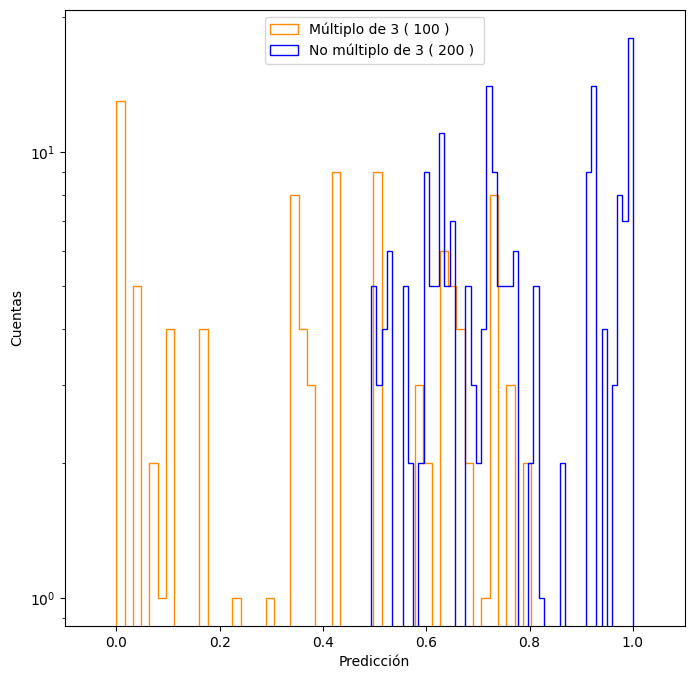

In [35]:
plt.figure(1,figsize=(8,8)) # figura numero 4
plt.style.use('seaborn-deep')
#plt.hist(pred,100,histtype='step')
# seleccionamos los datos que cumplen que testY==0 es argo
c=np.where(testY==0)
print("test 0s number:  ",len(c[0]))
plt.hist(pred[c[0]],50,histtype='step',color='darkorange', label= "Múltiplo de 3 ( %d ) " % (len(c[0]) ))
# selecionamos los de cuello testY==1
c=np.where(testY==1)
print("test 1s number:  ", len(c[0]))
plt.hist(pred[c[0]],50,histtype='step',color='blue', label= "No múltiplo de 3 ( %d ) " % (len(c[0]) ))
plt.ylabel('Cuentas')
plt.xlabel('Predicción')
plt.yscale("log")
plt.xlim(-0.1,1.1)
plt.legend( loc='upper center')

## Propuestas adicionales.

*   Modificar el número de neuronas y capas para mejorar el rendimiento de la red.
*   Hacer un clasificador multivariante en la salida que pronostique independiente si la suma será múltiplo de 3 y de 5.
*   Modificar la red añadiendo dropout.

## Propuestas adicionales: no te quedes con hambre.

*   Construir un clasificador de múltiplos de 11. ¿Es el rendimiento del clasificador mejor que el múltiplos de 3?
*   En el conjunto de entrenamiento ¿cuál es la proporción entre instancias/ejemplos de ambas clases? ¿Está más o menos desbalanceadas las clases que en clasificador de múltiplos de 3?   
*   Si el batch_size es 8 ó 16 ¿cuántos instancias/ejemplos de la clase minoritaria entran de media en cada batch? ¿Si los pesos de la red se actualizan con cada batch, entonces el aprendizaje de las características de la clase minoritaria está siendo adecuado?
*   ¿Qué técnicas existen para corregir los problemas de clasificación con clases fuertemente desbalanceadas?
